In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from my_utils import scale_dataset
from my_utils import plot_histograms
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from my_utils import plot_accuracy
from my_utils import plot_loss

In [2]:
cols = ["times_pregnant", "plasma_glucose_conc", "diabp", "skin_thickness", "serum_insulin", "BMI", "dia_ped_func", "age", "class"]

In [3]:
df = pd.read_csv("pima-indians-diabetes.csv", names = cols)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   times_pregnant       768 non-null    int64  
 1   plasma_glucose_conc  768 non-null    int64  
 2   diabp                768 non-null    int64  
 3   skin_thickness       768 non-null    int64  
 4   serum_insulin        768 non-null    int64  
 5   BMI                  768 non-null    float64
 6   dia_ped_func         768 non-null    float64
 7   age                  768 non-null    int64  
 8   class                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


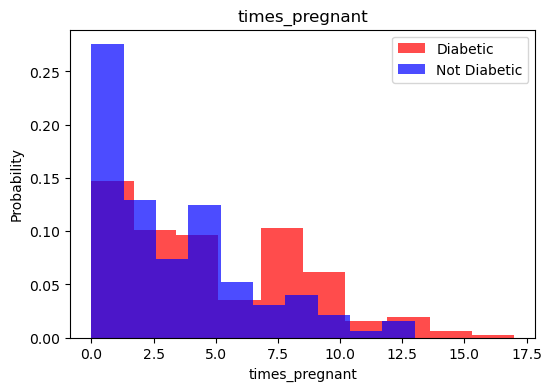

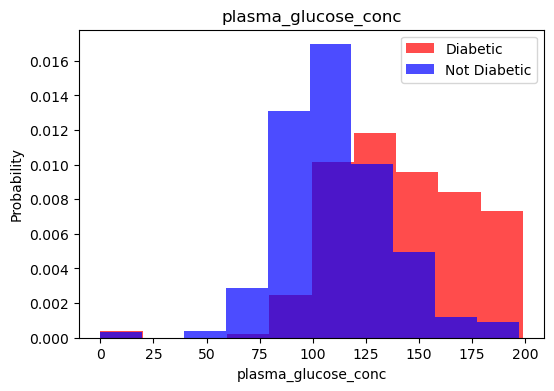

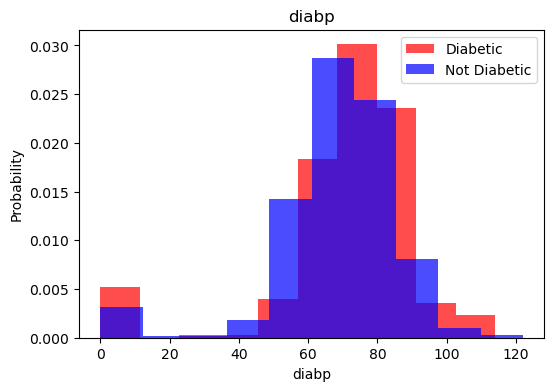

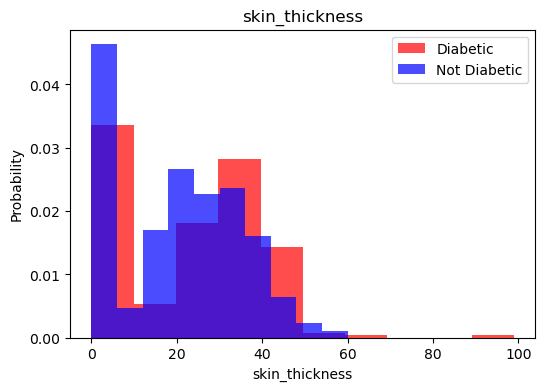

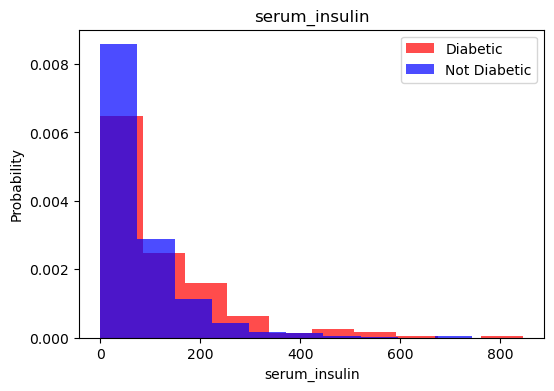

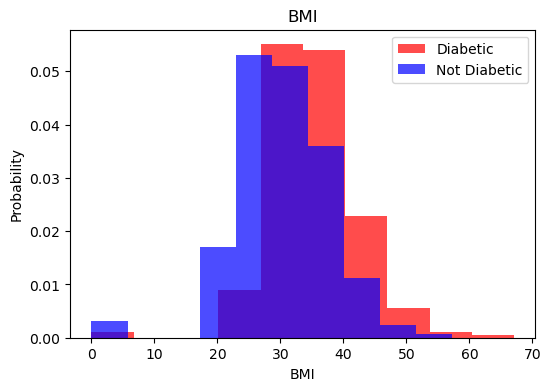

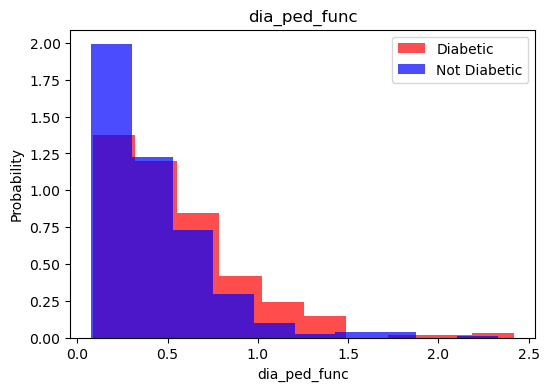

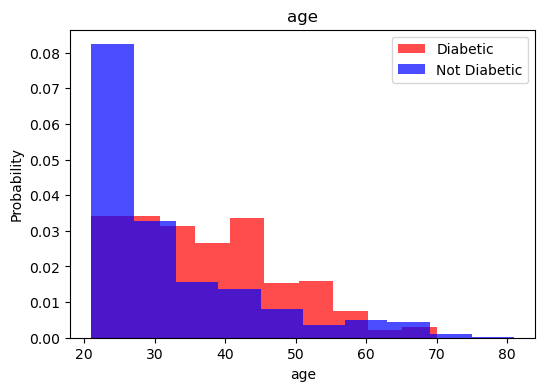

In [5]:
plot_histograms(df, cols[:-1])

In [6]:
print(len(df[df['class']==0]))
print(len(df[df['class']==1]))

500
268


In [7]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\saifm\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# K Nearest Neighbors 

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
y_pred = knn_model.predict(X_test)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       101
           1       0.62      0.68      0.65        53

    accuracy                           0.75       154
   macro avg       0.72      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# Naive bayes Algo

In [12]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [13]:
y_pred_nb = nb_model.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       101
           1       0.67      0.74      0.70        53

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



# Logistic Regression

In [15]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, y_train)

In [16]:
y_pred_lr = lr_model.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       101
           1       0.64      0.74      0.68        53

    accuracy                           0.77       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154



# Support Vector Classifier

In [18]:
svc_model = SVC()
svc_model = svc_model.fit(X_train, y_train)

In [19]:
y_pred_svc = svc_model.predict(X_test)

In [20]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       101
           1       0.66      0.75      0.70        53

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.78      0.78       154



# Neural Network Classification

In [21]:
mlp_model = MLPClassifier()
mlp_model = mlp_model.fit(X_train, y_train)

C:\Users\saifm\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
y_pred_mlp = mlp_model.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       101
           1       0.64      0.70      0.67        53

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154



# Tensor Flow neural net

In [24]:
tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(8,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
tf_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\saifm\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
history = tf_model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_split = 0.2,
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5819 - loss: 0.6887 - val_accuracy: 0.1121 - val_loss: 0.8147
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6595 - loss: 0.6332 - val_accuracy: 0.2672 - val_loss: 0.7997
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6918 - loss: 0.5938 - val_accuracy: 0.4310 - val_loss: 0.7783
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7306 - loss: 0.5612 - val_accuracy: 0.5948 - val_loss: 0.7178
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7392 - loss: 0.5366 - val_accuracy: 0.6293 - val_loss: 0.6924
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7500 - loss: 0.5186 - val_accuracy: 0.6293 - val_loss: 0.6896
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7586 - loss: 0.5056 - val_accuracy: 0.6379 - val_loss: 0.6424
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7522 - loss: 0.4963 - val_accuracy: 0.

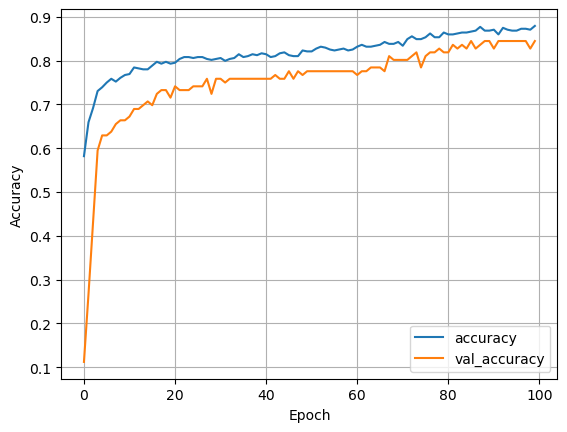

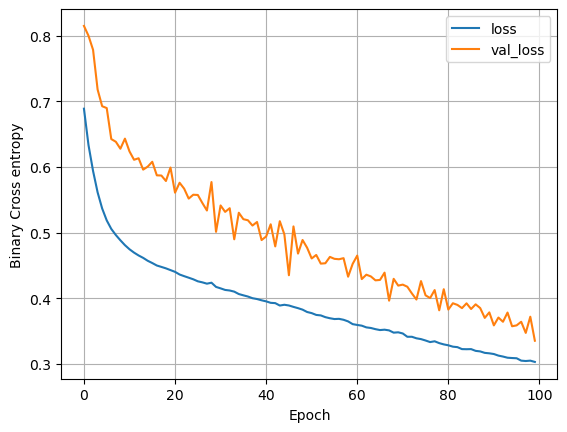

In [26]:
plot_accuracy(history)
plot_loss(history)